In [177]:
import pandas as pd
import numpy as np 
import seaborn as sb
from matplotlib import pyplot as plt
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
%matplotlib inline

In [178]:
# READ BOTH CPI AND FEDRATES CSV FILES
cpi_df = pd.read_csv('cpi.csv', parse_dates=True)
rates_df = pd.read_csv('rates.csv', parse_dates=True)

In [179]:
# SET COLUMNS
cpi_df.columns = ['DATE', 'INFLATION %']
rates_df.columns = ['DATE', 'FUNDSRATE %']

In [180]:
rates_df.head(6)

,DATE,FUNDSRATE %
0,1960-02-01,3.97
1,1960-03-01,3.84
2,1960-04-01,3.92
3,1960-05-01,3.85
4,1960-06-01,3.32
5,1960-07-01,3.23


In [181]:
# CREATE A 5 YEAR MOVING AVERAGE COLUMN OF THE CPI INFLATION
cpi_df['5 SMA'] = cpi_df['INFLATION %'].rolling(5).mean()

In [182]:
# FILL THE NULL VALUES WITH 0
cpi_df['5 SMA'] = cpi_df['5 SMA'].fillna(0)

In [183]:
# how to use if condition to set 0 or null values to the value of the column to the left?
# cpi_df.loc[df['SMA'] < 0.001, cpi_df['SMA']] = cpi_df['INFLATION %']

In [184]:
# CPI DIFFERENTIAL YEAR OVER YEAR 
cpi_df['YOY_CHANGE'] = cpi_df['INFLATION %'].diff()

# REPLACE NULLS WITH 0's
cpi_df['YOY_CHANGE'] = cpi_df['YOY_CHANGE'].fillna(0)

In [185]:
# FUNDS RATE DIFFERENTIAL YEAR OVER YEAR 
rates_df['YOY_CHANGE'] = rates_df['FUNDSRATE %'].diff()

# REPLACE NULLS WITH 0's
rates_df['YOY_CHANGE'] = rates_df['YOY_CHANGE'].fillna(0)

In [186]:
#size = len(rates_df['DATE'])
#_xticks = [x for x in range(rates_df['DATE'].min(), rates_df['DATE'].max() +step, step)]

In [187]:
_xticks = [x for i, x in enumerate(rates_df['DATE']) if i%48==0]

C:\Users\leif\AppData\Local\Temp/ipykernel_21176/3198071965.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  item.set_xticklabels(xtick_labels, rotation=45)


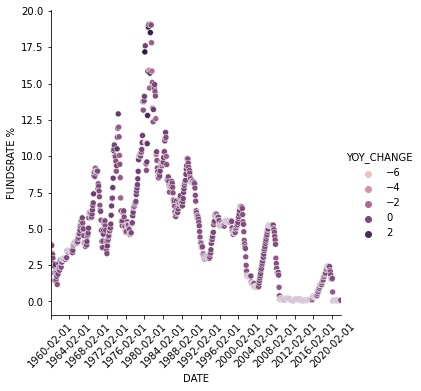

In [188]:

g = sb.relplot(x = 'DATE', y = 'FUNDSRATE %', hue = 'YOY_CHANGE', data= rates_df)

xtick_labels = ['-'.join(date.split('-'))
                for date in _xticks]
                
for item in g.axes.flat:
    item.set_xticklabels(xtick_labels, rotation=45)
    
g.set(xlim=(rates_df['DATE'].min(), rates_df['DATE'].max()), xticks = _xticks)

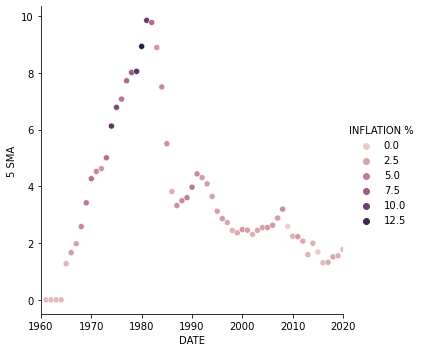

In [189]:
g = sb.relplot(x = 'DATE', y = '5 SMA', hue = 'INFLATION %', data= cpi_df)

g.set(xlim=(1960,2020))

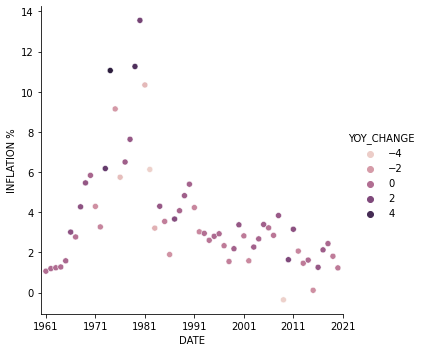

In [190]:
g = sb.relplot(x = 'DATE', y = 'INFLATION %', hue = 'YOY_CHANGE', data= cpi_df)

step = 10
_xticks = [x for x in range(cpi_df['DATE'].min(), cpi_df['DATE'].max() +step, step)]

g.set(xlim=(1960,2020), xticks=_xticks)


In [218]:
rates_df['5 SMA'] = rates_df['FUNDSRATE %'].rolling(5).mean()
rates_df.head(10)

,DATE,FUNDSRATE %,YOY_CHANGE,5 SMA
0,1960-02-01,3.97,0.00,NaN
1,1960-03-01,3.84,-0.13,NaN
2,1960-04-01,3.92,0.08,NaN
3,1960-05-01,3.85,-0.07,NaN
4,1960-06-01,3.32,-0.53,3.780
5,1960-07-01,3.23,-0.09,3.632
6,1960-08-01,2.98,-0.25,3.460
7,1960-09-01,2.60,-0.38,3.196
8,1960-10-01,2.47,-0.13,2.920
9,1960-11-01,2.44,-0.03,2.744


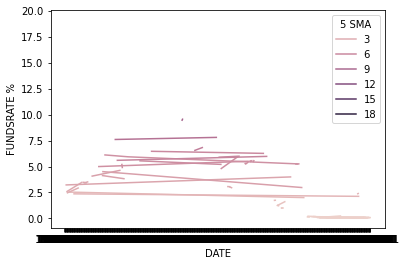

In [222]:
fg = sb.lineplot(x='DATE', y='FUNDSRATE %', hue="5 SMA", data=rates_df, ci=None)

In [196]:
cpi_df.head()



,DATE,INFLATION %,5 SMA,YOY_CHANGE
0,1961,1.070724,0.00000,0.000000
1,1962,1.198773,0.00000,0.128049
2,1963,1.239669,0.00000,0.040896
3,1964,1.278912,0.00000,0.039242
4,1965,1.585169,1.27465,0.306258


In [202]:
concatenated = pd.concat([cpi_df.assign(dataset='set1'), rates_df.assign(dataset='set2')])

ValueError: Unable to parse string "1960-02-01" at position 60

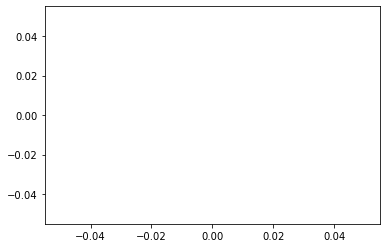

In [203]:
g = sb.lineplot(x = 'DATE', y = 'INFLATION %', data = concatenated)